In [ ]:
!cp /content/drive/MyDrive/KPMG_VI_New_raw_data_update_final.xlsx /content/

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore", category = FutureWarning)


In [ ]:
customer_demograph = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "CustomerDemographic", skiprows = [0], parse_dates= ["DOB"])

In [ ]:
transact = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "Transactions", skiprows = [0], parse_dates= ["transaction_date"])

In [ ]:
new_customer_list = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name= "NewCustomerList", skiprows = [0], parse_dates= ["DOB"])

In [ ]:
addresses_df = pd.read_excel("/content/KPMG_VI_New_raw_data_update_final.xlsx", sheet_name="CustomerAddress", skiprows=[0])

In [ ]:
print(customer_demograph.shape)
print(transact.shape)
print(new_customer_list.shape)
print(address_df.shape)

(4000, 13)
(20000, 13)
(1000, 23)


NameError: ignored

> Data Cleaning for Customer Demograph


In [ ]:
customer_demograph.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
customer_demograph.drop(["first_name", "last_name","job_title","default"], axis = 1, inplace= True)

In [ ]:
customer_demograph["customer_age"] = 2021.0 - customer_demograph.DOB.dt.year 
customer_demograph = customer_demograph[customer_demograph.customer_age < 100]
customer_demograph.drop("DOB", axis = 1, inplace  = True)
customer_demograph.customer_age = customer_demograph.customer_age.fillna(method = "ffill")

In [ ]:
customer_demograph.customer_age.max()

90.0

In [ ]:
customer_demograph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 3911
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3912 non-null   int64  
 1   gender                               3912 non-null   object 
 2   past_3_years_bike_related_purchases  3912 non-null   int64  
 3   job_industry_category                3256 non-null   object 
 4   wealth_segment                       3912 non-null   object 
 5   deceased_indicator                   3912 non-null   object 
 6   owns_car                             3912 non-null   object 
 7   tenure                               3912 non-null   float64
 8   customer_age                         3912 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [ ]:
customer_demograph.job_industry_category = customer_demograph.job_industry_category.fillna(method = "ffill")
customer_demograph.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3912 entries, 0 to 3911
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3912 non-null   int64  
 1   gender                               3912 non-null   object 
 2   past_3_years_bike_related_purchases  3912 non-null   int64  
 3   job_industry_category                3912 non-null   object 
 4   wealth_segment                       3912 non-null   object 
 5   deceased_indicator                   3912 non-null   object 
 6   owns_car                             3912 non-null   object 
 7   tenure                               3912 non-null   float64
 8   customer_age                         3912 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [ ]:
for cat_col in customer_demograph.select_dtypes(include = object).columns: 
    print(f"Uniques in       {cat_col}    :      {customer_demograph[cat_col].unique()}")

Uniques in       gender    :      ['Male' 'Female' 'F' 'Femal' 'M']
Uniques in       job_industry_category    :      ['Retail' 'Property' 'Manufacturing' 'Health' 'IT' 'Entertainment'
 'Financial Services' 'Argiculture' 'Telecommunications']
Uniques in       wealth_segment    :      ['Affluent Customer' 'Mass Customer' 'High Net Worth']
Uniques in       deceased_indicator    :      ['N' 'Y']
Uniques in       owns_car    :      ['No' 'Yes']


In [ ]:
customer_demograph.gender.unique()

array(['Male', 'Female', 'F', 'Femal', 'M'], dtype=object)

In [ ]:
gender_list = []
for gender in customer_demograph.gender:
    if gender == "F" or gender == "Femal":
        gender = "Female"
    elif gender == "M":
        gender = "Male"

    gender_list.append(gender)

customer_demograph["gender"] = gender_list

In [ ]:
customer_demograph.gender.unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
for cat_col in customer_demograph.select_dtypes(include = object).columns: 
    print(f"Uniques in       {cat_col}    :      {customer_demograph[cat_col].unique()}")

Uniques in       gender    :      ['Male' 'Female']
Uniques in       job_industry_category    :      ['Retail' 'Property' 'Manufacturing' 'Health' 'IT' 'Entertainment'
 'Financial Services' 'Argiculture' 'Telecommunications']
Uniques in       wealth_segment    :      ['Affluent Customer' 'Mass Customer' 'High Net Worth']
Uniques in       deceased_indicator    :      ['N' 'Y']
Uniques in       owns_car    :      ['No' 'Yes']


In [ ]:
addresses_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
postcode_generalized = []
for postcode in addresses_df.postcode:
    post_code = round(postcode, -2)
    postcode_generalized.append(post_code)

addresses_df["postcode"] = postcode_generalized
addresses_df["postcode"] = addresses_df.postcode.astype(str)

In [ ]:
addresses_df.drop(["address", "country"], axis = 1, inplace = True)

In [ ]:
state_cleaned = []
for state in addresses_df.state:
    if state == "Victoria":
        state = "VIC"
    elif state == "New South Wales":
        state = "NSW"
    state_cleaned.append(state)

addresses_df["state"] = state_cleaned

In [ ]:
customer_demograph_plus_address = customer_demograph.merge(addresses_df, on= "customer_id")

In [ ]:
customer_demograph_plus_address.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3908 entries, 0 to 3907
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3908 non-null   int64  
 1   gender                               3908 non-null   object 
 2   past_3_years_bike_related_purchases  3908 non-null   int64  
 3   job_industry_category                3908 non-null   object 
 4   wealth_segment                       3908 non-null   object 
 5   deceased_indicator                   3908 non-null   object 
 6   owns_car                             3908 non-null   object 
 7   tenure                               3908 non-null   float64
 8   customer_age                         3908 non-null   float64
 9   postcode                             3908 non-null   object 
 10  state                                3908 non-null   object 
 11  property_valuation            

In [ ]:
for cat_col in customer_demograph_plus_address.select_dtypes(include = object).columns: 
    print(f"Uniques in       {cat_col}    :      {customer_demograph_plus_address[cat_col].unique()}")

Uniques in       gender    :      ['Male' 'Female']
Uniques in       job_industry_category    :      ['Retail' 'Property' 'Manufacturing' 'Health' 'IT' 'Entertainment'
 'Financial Services' 'Argiculture' 'Telecommunications']
Uniques in       wealth_segment    :      ['Affluent Customer' 'Mass Customer' 'High Net Worth']
Uniques in       deceased_indicator    :      ['N' 'Y']
Uniques in       owns_car    :      ['No' 'Yes']
Uniques in       postcode    :      ['2000' '3300' '3100' '3000' '2200' '2100' '4800' '3400' '3200' '4000'
 '4700' '2600' '2500' '4300' '2300' '4600' '3600' '4200' '4400' '4500'
 '3900' '3800' '4100' '2800' '2700' '3700' '2400' '2900' '4900' '3500']
Uniques in       state    :      ['NSW' 'VIC' 'QLD']


In [ ]:
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [ ]:
id_vs_transact_amount = transact[transact.order_status == "Approved"][["customer_id", "standard_cost"]].groupby("customer_id", as_index = False).sum()

In [ ]:
id_vs_transact_amount.shape

(3493, 2)

In [ ]:
id_vs_transact_count = transact[transact.order_status == "Approved"][["customer_id", "standard_cost"]].groupby("customer_id", as_index = False).count()

In [ ]:
id_vs_transact_count.shape

(3493, 2)

In [ ]:
customer_spending = id_vs_transact_amount.merge(id_vs_transact_count, on = "customer_id")

In [ ]:
customer_spending.head()

,customer_id,standard_cost_x,standard_cost_y
0,1,6066.36,11
1,2,1922.81,3
2,3,6525.42,8
3,4,827.15,2
4,5,3508.26,6


In [ ]:
customer_spending["customer_spending_rate"] = round(customer_spending.standard_cost_x / customer_spending.standard_cost_y , 2)

In [ ]:
customer_spending.drop(["standard_cost_y", "standard_cost_x"], axis = 1, inplace = True)
customer_spending.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3493 entries, 0 to 3492
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             3493 non-null   int64  
 1   customer_spending_rate  3493 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 81.9 KB


In [ ]:
demograph_analysis_draft = customer_demograph_plus_address.merge(customer_spending, on= 'customer_id')
demograph_analysis_draft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 0 to 3410
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3411 non-null   int64  
 1   gender                               3411 non-null   object 
 2   past_3_years_bike_related_purchases  3411 non-null   int64  
 3   job_industry_category                3411 non-null   object 
 4   wealth_segment                       3411 non-null   object 
 5   deceased_indicator                   3411 non-null   object 
 6   owns_car                             3411 non-null   object 
 7   tenure                               3411 non-null   float64
 8   customer_age                         3411 non-null   float64
 9   postcode                             3411 non-null   object 
 10  state                                3411 non-null   object 
 11  property_valuation            

In [ ]:
demograph_analysis_draft.customer_id.duplicated().sum()

0

In [ ]:
for cat_col in demograph_analysis_draft.select_dtypes(include = object).columns: 
    print(f"Uniques in       {cat_col}    :      {demograph_analysis_draft[cat_col].unique()}")

Uniques in       gender    :      ['Male' 'Female']
Uniques in       job_industry_category    :      ['Retail' 'Property' 'Manufacturing' 'Health' 'IT' 'Entertainment'
 'Financial Services' 'Argiculture' 'Telecommunications']
Uniques in       wealth_segment    :      ['Affluent Customer' 'Mass Customer' 'High Net Worth']
Uniques in       deceased_indicator    :      ['N' 'Y']
Uniques in       owns_car    :      ['No' 'Yes']
Uniques in       postcode    :      ['2000' '3300' '3100' '3000' '2200' '2100' '4800' '3400' '3200' '4000'
 '4700' '2600' '2500' '4300' '4600' '3600' '4200' '4400' '4500' '3900'
 '2300' '3800' '2700' '2800' '3700' '2400' '4100' '2900' '4900' '3500']
Uniques in       state    :      ['NSW' 'VIC' 'QLD']


In [ ]:
interest_numeric_col = demograph_analysis_draft.loc[:,"gender":].select_dtypes(exclude = object).columns
interest_numeric_col

Index(['past_3_years_bike_related_purchases', 'tenure', 'customer_age',
       'property_valuation', 'customer_spending_rate'],
      dtype='object')

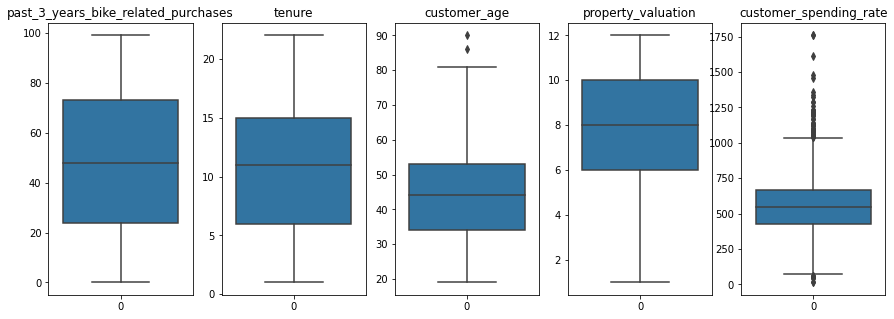

In [ ]:
fig, axe = plt.subplots(1, len(interest_numeric_col), figsize = (15, 5))
for i, nu_col in enumerate(interest_numeric_col):
    sns.boxplot(data = demograph_analysis_draft[nu_col], ax = axe[i]).set_title(nu_col)

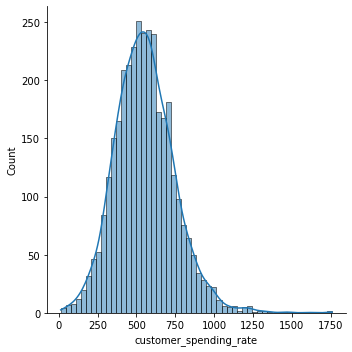

In [ ]:
sns.displot(demograph_analysis_draft.customer_spending_rate, kde= True)

In [ ]:
print(f"Percentage of customer spending over average : {round(100 * demograph_analysis_draft[demograph_analysis_draft.customer_spending_rate > 600].count()[0]/demograph_analysis_draft.count()[0], 2)}")

Percentage of customer spending over average : 37.88


In [ ]:
demograph_analysis_draft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 0 to 3410
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3411 non-null   int64  
 1   gender                               3411 non-null   object 
 2   past_3_years_bike_related_purchases  3411 non-null   int64  
 3   job_industry_category                3411 non-null   object 
 4   wealth_segment                       3411 non-null   object 
 5   deceased_indicator                   3411 non-null   object 
 6   owns_car                             3411 non-null   object 
 7   tenure                               3411 non-null   float64
 8   customer_age                         3411 non-null   float64
 9   postcode                             3411 non-null   object 
 10  state                                3411 non-null   object 
 11  property_valuation            

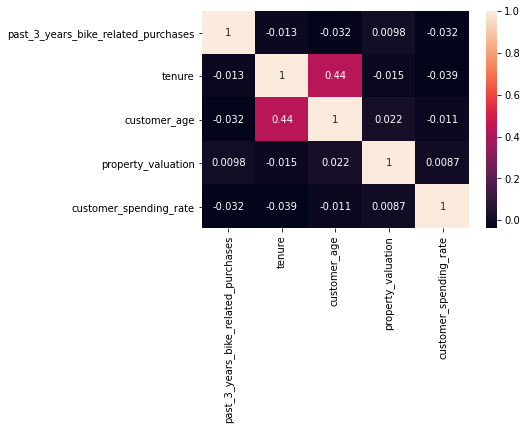

In [ ]:
corrMatrix = demograph_analysis_draft[["past_3_years_bike_related_purchases", "tenure", "customer_age", "property_valuation", "customer_spending_rate"]].corr()

sns.heatmap(corrMatrix, annot = True)

plt.show()

In [ ]:
limit = int(demograph_analysis_draft.customer_spending_rate.mean())

high_value = []

for rate in demograph_analysis_draft.customer_spending_rate:
    if rate > limit:
        high_value.append("y")
    else:
        high_value.append("n")

demograph_analysis_draft["high_value"] = high_value

demograph_analysis_draft.drop("customer_spending_rate", axis = 1, inplace=True)

demograph_analysis_draft.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 0 to 3410
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3411 non-null   int64  
 1   gender                               3411 non-null   object 
 2   past_3_years_bike_related_purchases  3411 non-null   int64  
 3   job_industry_category                3411 non-null   object 
 4   wealth_segment                       3411 non-null   object 
 5   deceased_indicator                   3411 non-null   object 
 6   owns_car                             3411 non-null   object 
 7   tenure                               3411 non-null   float64
 8   customer_age                         3411 non-null   float64
 9   postcode                             3411 non-null   object 
 10  state                                3411 non-null   object 
 11  property_valuation            

In [ ]:
demograph_analysis = demograph_analysis_draft.loc[:, "gender":]
demograph_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3411 entries, 0 to 3410
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               3411 non-null   object 
 1   past_3_years_bike_related_purchases  3411 non-null   int64  
 2   job_industry_category                3411 non-null   object 
 3   wealth_segment                       3411 non-null   object 
 4   deceased_indicator                   3411 non-null   object 
 5   owns_car                             3411 non-null   object 
 6   tenure                               3411 non-null   float64
 7   customer_age                         3411 non-null   float64
 8   postcode                             3411 non-null   object 
 9   state                                3411 non-null   object 
 10  property_valuation                   3411 non-null   int64  
 11  high_value                    

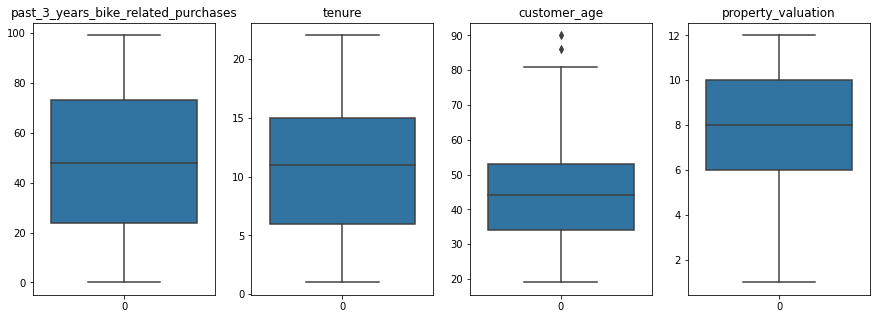

In [ ]:
interest_numeric_col = demograph_analysis.select_dtypes(exclude = object).columns

fig, axe = plt.subplots(1, len(interest_numeric_col), figsize = (15, 5))
for i, nu_col in enumerate(interest_numeric_col):
    sns.boxplot(data = demograph_analysis[nu_col], ax = axe[i]).set_title(nu_col)


In [ ]:
for cat_col in demograph_analysis.select_dtypes(include = object).columns: 
    print(f"Uniques in       {cat_col}    :      {demograph_analysis[cat_col].unique()}")

Uniques in       gender    :      ['Male' 'Female']
Uniques in       job_industry_category    :      ['Retail' 'Property' 'Manufacturing' 'Health' 'IT' 'Entertainment'
 'Financial Services' 'Argiculture' 'Telecommunications']
Uniques in       wealth_segment    :      ['Affluent Customer' 'Mass Customer' 'High Net Worth']
Uniques in       deceased_indicator    :      ['N' 'Y']
Uniques in       owns_car    :      ['No' 'Yes']
Uniques in       postcode    :      ['2000' '3300' '3100' '3000' '2200' '2100' '4800' '3400' '3200' '4000'
 '4700' '2600' '2500' '4300' '4600' '3600' '4200' '4400' '4500' '3900'
 '2300' '3800' '2700' '2800' '3700' '2400' '4100' '2900' '4900' '3500']
Uniques in       state    :      ['NSW' 'VIC' 'QLD']
Uniques in       high_value    :      ['y' 'n']


In [ ]:
demograph_analysis.to_csv("customer_segmenting_train.csv", index = False)

In [ ]:
!cp /content/customer_segmenting_train.csv /content/drive/MyDrive

In [ ]:
focused_col = demograph_analysis.columns[:-1]

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'customer_age', 'postcode', 'state',
       'property_valuation'],
      dtype='object')

In [ ]:
new_customer_list["customer_age"] = 2021.0 - new_customer_list.DOB.dt.year

In [ ]:
new_customer_list = new_customer_list[focused_col]

In [ ]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               1000 non-null   object 
 1   past_3_years_bike_related_purchases  1000 non-null   int64  
 2   job_industry_category                835 non-null    object 
 3   wealth_segment                       1000 non-null   object 
 4   deceased_indicator                   1000 non-null   object 
 5   owns_car                             1000 non-null   object 
 6   tenure                               1000 non-null   int64  
 7   customer_age                         983 non-null    float64
 8   postcode                             1000 non-null   int64  
 9   state                                1000 non-null   object 
 10  property_valuation                   1000 non-null   int64  
dtypes: float64(1), int64(4), object

In [ ]:
postcode_generalized = []
for postcode in new_customer_list.postcode:
    post_code = round(postcode, -2)
    postcode_generalized.append(post_code)

new_customer_list["postcode"] = postcode_generalized
new_customer_list["postcode"] = new_customer_list.postcode.astype(str)

In [ ]:
new_customer_list = new_customer_list.dropna()

In [ ]:
new_customer_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 818 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   gender                               818 non-null    object 
 1   past_3_years_bike_related_purchases  818 non-null    int64  
 2   job_industry_category                818 non-null    object 
 3   wealth_segment                       818 non-null    object 
 4   deceased_indicator                   818 non-null    object 
 5   owns_car                             818 non-null    object 
 6   tenure                               818 non-null    int64  
 7   customer_age                         818 non-null    float64
 8   postcode                             818 non-null    object 
 9   state                                818 non-null    object 
 10  property_valuation                   818 non-null    int64  
dtypes: float64(1), int64(3), object(

In [ ]:
for cat_col in new_customer_list.select_dtypes(include = object).columns: 
    print(f"Uniques in       {cat_col}    :      {new_customer_list[cat_col].unique()}")

Uniques in       gender    :      ['Male' 'Female']
Uniques in       job_industry_category    :      ['Manufacturing' 'Property' 'Financial Services' 'Entertainment' 'Retail'
 'IT' 'Telecommunications' 'Health' 'Argiculture']
Uniques in       wealth_segment    :      ['Mass Customer' 'Affluent Customer' 'High Net Worth']
Uniques in       deceased_indicator    :      ['N']
Uniques in       owns_car    :      ['Yes' 'No']
Uniques in       postcode    :      ['4500' '2100' '3500' '4800' '4100' '2600' '2200' '4200' '4600' '3200'
 '2000' '2500' '3000' '2800' '4700' '4000' '3100' '2300' '3300' '4900'
 '3700' '3800' '3400' '2400' '3900' '4400' '4300' '2700' '3600' '2900']
Uniques in       state    :      ['QLD' 'NSW' 'VIC']


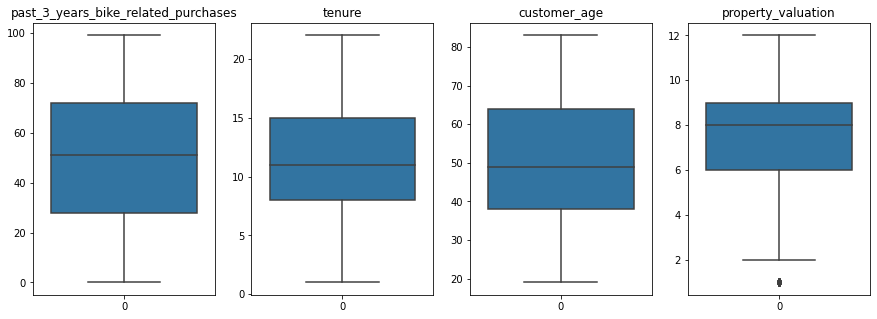

In [ ]:
interest_numeric_col = new_customer_list.select_dtypes(exclude = object).columns

fig, axe = plt.subplots(1, len(interest_numeric_col), figsize = (15, 5))
for i, nu_col in enumerate(interest_numeric_col):
    sns.boxplot(data = new_customer_list[nu_col], ax = axe[i]).set_title(nu_col)

In [ ]:
print(len(demograph_analysis.columns))
print(len(new_customer_list.columns))

12
11


In [ ]:
print(demograph_analysis.columns)
print(new_customer_list.columns)

Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'customer_age', 'postcode', 'state',
       'property_valuation', 'high_value'],
      dtype='object')
Index(['gender', 'past_3_years_bike_related_purchases',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'customer_age', 'postcode', 'state',
       'property_valuation'],
      dtype='object')


In [ ]:
new_customer_list.to_csv("customer_segmenting_test.csv", index = False)

In [ ]:
!cp /content/customer_segmenting_test.csv /content/drive/MyDrive

In [ ]:
for cat_col_train, cat_col_test in zip(demograph_analysis.select_dtypes(include = object).columns, new_customer_list.select_dtypes(include = object).columns): 
    if sorted(list(new_customer_list[cat_col_test].unique())) == sorted(list(demograph_analysis[cat_col_train].unique())):
        print(f"{cat_col_train} -----> Matched")
    else: 
        print(f"{cat_col_train} ------> Not Matched.")

gender -----> Matched
job_industry_category -----> Matched
wealth_segment -----> Matched
deceased_indicator ------> Not Matched.
owns_car -----> Matched
postcode -----> Matched
state -----> Matched
